In [1]:
#Tasks - Module 2 - Time Series Analysis

#Loading necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as scp
import seaborn as sns

ModuleNotFoundError: No module named 'matplotlib'

#Task 1

#Reading in the wages dataset

wages_df = pd.read_csv("wages.csv")

wages_df.head()

In [5]:
#Checking the class of the dataframe

wages_df.dtypes

NameError: name 'wages_df' is not defined

In [4]:
#Creating the date column based on datetime64 format
wages_df['CorrectDate'] = pd.to_datetime(wages_df['Time'])

#Creating another Time column for creation of time stamp later
wages_df['Time_corrected'] = pd.to_datetime(wages_df['Time'])

#Setting the index of the dataframe to the Time column
wages_df.set_index('CorrectDate', inplace=True)
#There is no need to convert the column to ts object as in R - setting to index would suffice

In [5]:
#Displaying the wages data

wages_df.head()

,Time,Wages,Time_corrected
CorrectDate,,,
1981-07-01,07/01/81,7.75,1981-07-01
1981-08-01,08/01/81,7.74,1981-08-01
1981-09-01,09/01/81,7.87,1981-09-01
1981-10-01,10/01/81,7.89,1981-10-01
1981-11-01,11/01/81,7.94,1981-11-01


In [6]:
#Checking the data types

wages_df.dtypes

Time                      object
Wages                    float64
Time_corrected    datetime64[ns]
dtype: object

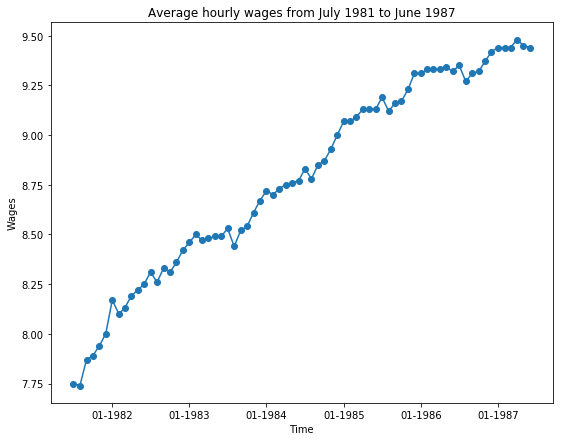

In [7]:
#Plotting the time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(wages_df.index.values, wages_df['Wages'],'-o')
ax.set(xlabel="Time",ylabel="Wages",title="Average hourly wages from July 1981 to June 1987")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%m-%Y"))


In [8]:
#Creating the variables for linear regression

#In R, time function was used to create time stamps where frequency of the time series is greater than 1, i.e. when it is 
#monthly data, time function would automatically create time stamps for each month of the year
#for example when starting year is 1886, and when freq > 1 it does x = x + 1/freq to give:

#Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
#1886.000 1886.083 1886.167 1886.250 1886.333 1886.417 1886.500 1886.583 1886.667 1886.750 1886.833 1886.917



In [9]:
#In the absence of the time function in Python, the time stamp variable is manually created for the linear regression

wages_df['year'] =wages_df['Time_corrected'].dt.year
wages_df['month'] =wages_df['Time_corrected'].dt.month

In [10]:
#Creating the timestamps
wages_df['time_stamp'] = wages_df.year+((wages_df.month-1)/12)

In [11]:
wages_df.head()

,Time,Wages,Time_corrected,year,month,time_stamp
CorrectDate,,,,,,
1981-07-01,07/01/81,7.75,1981-07-01,1981,7,1981.500000
1981-08-01,08/01/81,7.74,1981-08-01,1981,8,1981.583333
1981-09-01,09/01/81,7.87,1981-09-01,1981,9,1981.666667
1981-10-01,10/01/81,7.89,1981-10-01,1981,10,1981.750000
1981-11-01,11/01/81,7.94,1981-11-01,1981,11,1981.833333


In [12]:
#Fitting a linear time trend to the series
x=wages_df.time_stamp
y=wages_df.Wages

x = sm.add_constant(x)
model = sm.OLS(y,x)
model_linear1 = model.fit()

In [13]:
#Displaying the summary of the model
model_linear1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Wages   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     2503.
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           1.58e-56
Time:                        00:10:10   Log-Likelihood:                 78.429
No. Observations:                  72   AIC:                            -152.9
Df Residuals:                      70   BIC:                            -148.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -549.0061     11.150    -49.240      0.000    -571.243    -526.769
time_stamp     0.2811      0.006     50.028      0.000       0.270       0.292
==============================================================================
Omnibus:                        6.940   Durbin-Watson:                   0.292
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                6.763
Skew:                          -0.750   Prob(JB):                       0.0340
Kurtosis:                       3.082   Cond. No.                     2.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

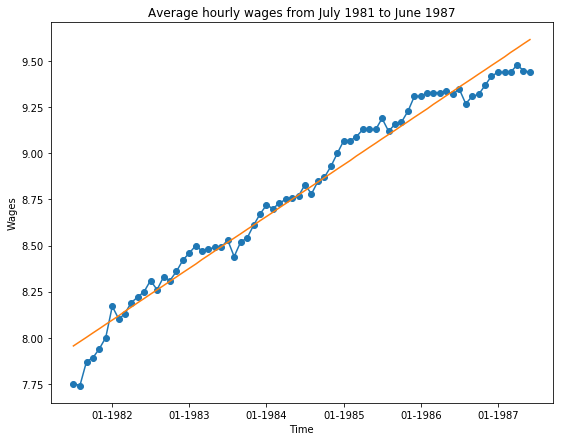

In [14]:
#Plotting the time series data with linear trend line

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(wages_df.index.values, wages_df['Wages'],'-o')
ax.set(xlabel="Time",ylabel="Wages",title="Average hourly wages from July 1981 to June 1987")

#To plot the linear regression line of best fit 
ax.plot(model_linear1.fittedvalues)

#Setting the ticks format on x-axis to years
ax.xaxis.set_major_formatter(DateFormatter("%m-%Y"))

In [15]:
#Getting the standardised residuals of the linear trend model

#Create instance of influence
influence = model_linear1.get_influence()
#Standardised residuals
standardised_residuals = influence.resid_studentized_internal

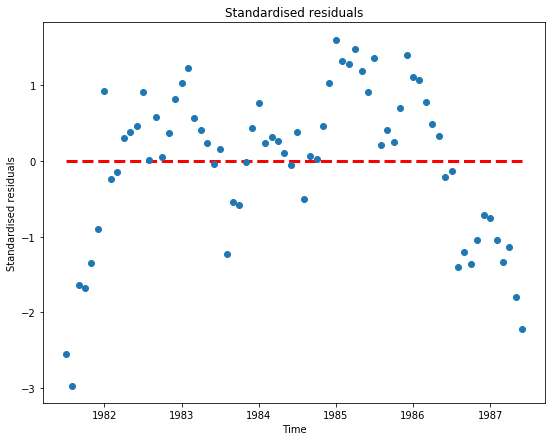

In [16]:
#Plotting the standardised residuals

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(wages_df.time_stamp, standardised_residuals,'o')
ax.set(xlabel="Time",ylabel="Standardised residuals",title="Standardised residuals")

#To get the horizontal zero line
xmin=min(wages_df.time_stamp)
xmax=max(wages_df.time_stamp)
ax.hlines(y=0,xmin=xmin,xmax=xmax,color='red',linestyle='--',lw=3)

In [17]:
#Fitting a quadratic trend model

#Creating the components of the model manually
x=wages_df.time_stamp
y=wages_df.Wages
x2=x*x

df = pd.DataFrame(columns=['y', 'x','x2'])
df['x'] = x
df['y'] = y
df['x2'] = x2

#Fitting the quadratic trend model to the data
model_quad1 = smf.ols(formula='y ~ x + x2', data=df).fit()


In [18]:
#Displaying the summary of the model
model_quad1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     2494.
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           4.53e-65
Time:                        00:10:10   Log-Likelihood:                 103.27
No. Observations:                  72   AIC:                            -200.5
Df Residuals:                      69   BIC:                            -193.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.495e+04   1.02e+04     -8.336      0.000   -1.05e+05   -6.46e+04
x             85.3429     10.271      8.309      0.000      64.853     105.833
x2            -0.0214      0.003     -8.282      0.000      -0.027      -0.016
==============================================================================
Omnibus:                        0.637   Durbin-Watson:                   0.560
Prob(Omnibus):                  0.727   Jarque-Bera (JB):                0.769
Skew:                          -0.177   Prob(JB):                        0.681
Kurtosis:                       2.639   Cond. No.                     5.78e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.34e-11. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

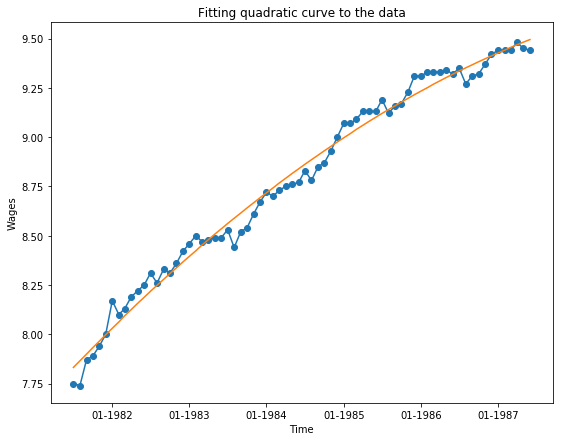

In [19]:
#Plotting the quadratic curve to the wages data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(wages_df.index.values, wages_df['Wages'],'-o')
ax.set(xlabel="Time",ylabel="Wages",title="Fitting quadratic curve to the data")

#To plot the qaudratic regression line 
ax.plot(model_quad1.fittedvalues)

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%m-%Y"))

In [20]:
#Getting the standardised residuals of the quadratic model

#Create instance of influence
influence_1 = model_quad1.get_influence()
#Standardised residuals
standardised_residuals_1 = influence_1.resid_studentized_internal

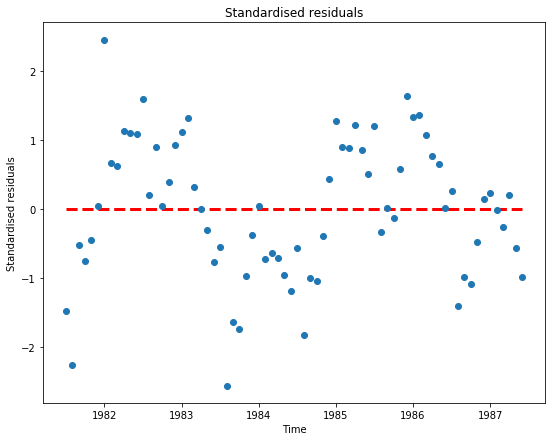

In [21]:
#Plotting the standardised residuals

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(wages_df.time_stamp, standardised_residuals_1,'o')
ax.set(xlabel="Time",ylabel="Standardised residuals",title="Standardised residuals")

#To get the horizontal zero line
xmin=min(wages_df.time_stamp)
xmax=max(wages_df.time_stamp)
ax.hlines(y=0,xmin=xmin,xmax=xmax,color='red',linestyle='--',lw=3)

In [22]:
##Task 2

#Reading in the necessary dataset

beersales_df = pd.read_csv("beersales.csv")

beersales_df.head()


,beersales,Time
0,11.1179,01/01/75
1,9.8413,02/01/75
2,11.5732,03/01/75
3,13.0097,04/01/75
4,13.4182,05/01/75


In [23]:
#Creating the date column based on datetime64 format
beersales_df['CorrectDate'] = pd.to_datetime(beersales_df['Time'])

#Setting the index of the dataframe to the Time column
beersales_df.set_index('CorrectDate', inplace=True)
#There is no need to convert the column to ts object as in R - setting to index would suffice

In [24]:
#Displaying the beersales data

beersales_df.head()

,beersales,Time
CorrectDate,,
1975-01-01,11.1179,01/01/75
1975-02-01,9.8413,02/01/75
1975-03-01,11.5732,03/01/75
1975-04-01,13.0097,04/01/75
1975-05-01,13.4182,05/01/75


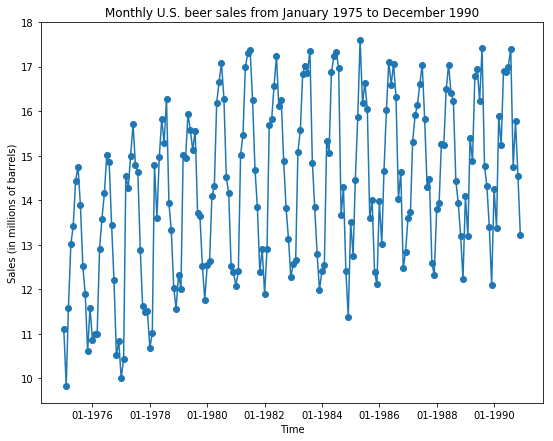

In [25]:
#Plotting the time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(beersales_df.index.values, beersales_df['beersales'],'-o')
ax.set(xlabel="Time",ylabel="Sales (in millions of barrels)",title="Monthly U.S. beer sales from January 1975 to December 1990")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%m-%Y"))

#There is no easy way to plot monthly symbols in python

In [26]:
#In the absence of the time function in Python, the time stamp variable is manually created for the regression

#Creating a new time column for creating time stamp later
beersales_df['Time_corrected'] = pd.to_datetime(beersales_df['Time'])

#Extracting the month and year from the beersales data
beersales_df['month'] =beersales_df['Time_corrected'].dt.month
beersales_df['year'] =beersales_df['Time_corrected'].dt.year

#Creating the time stamp
beersales_df['time_stamp'] = beersales_df.year+((beersales_df.month-1)/12)

#Setting the different months as levels for the seasonal trend model
beersales_df['month'] = beersales_df['month'].astype('category')


In [27]:
#Fitting a quadratic and seasonal trend model to the data

#Creating components of the model manually
x=beersales_df.time_stamp
y=beersales_df.beersales
x2=x*x
month=beersales_df['month']

df = pd.DataFrame(columns=['y','x','x2','month'])
df['x'] = x
df['y'] = y
df['x2'] = x2
df['month']=month

#Fitting the quadratic and seasonal trend model to the data without intercept (using -1)
model_season1 = smf.ols(formula='y ~ month+ x + x2 -1', data=df).fit()

#Displaying the summary of the model
model_season1.summary()
#The results are somewhat different to the one in R

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     138.8
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           9.38e-86
Time:                        00:10:11   Log-Likelihood:                -164.22
No. Observations:                 192   AIC:                             356.4
Df Residuals:                     178   BIC:                             402.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
month[1]    -7.15e+04   8791.411     -8.133      0.000   -8.88e+04   -5.41e+04
month[2]    -7.15e+04   8791.412     -8.133      0.000   -8.88e+04   -5.41e+04
month[3]    -7.15e+04   8791.412     -8.132      0.000   -8.88e+04   -5.41e+04
month[4]    -7.15e+04   8791.412     -8.132      0.000   -8.88e+04   -5.41e+04
month[5]   -7.149e+04   8791.412     -8.132      0.000   -8.88e+04   -5.41e+04
month[6]   -7.149e+04   8791.412     -8.132      0.000   -8.88e+04   -5.41e+04
month[7]   -7.149e+04   8791.412     -8.132      0.000   -8.88e+04   -5.41e+04
month[8]   -7.149e+04   8791.412     -8.132      0.000   -8.88e+04   -5.41e+04
month[9]    -7.15e+04   8791.412     -8.133      0.000   -8.88e+04   -5.41e+04
month[10]   -7.15e+04   8791.412     -8.133      0.000   -8.88e+04   -5.41e+04
month[11]   -7.15e+04   8791.412     -8.133      0.000   -8.88e+04   -5.41e+04
month[12]   -7.15e+04   8791.412     -8.133      0.000   -8.88e+04   -5.41e+04
x             71.9571      8.867      8.115      0.000      54.459      89.455
x2            -0.0181      0.002     -8.096      0.000      -0.023      -0.014
==============================================================================
Omnibus:                        1.438   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.487   Jarque-Bera (JB):                1.074
Skew:                          -0.141   Prob(JB):                        0.585
Kurtosis:                       3.235   Cond. No.                     2.81e+12
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#Getting the standardised residuals of the quadratic and seasonal trend model

#Create instance of influence
influence = model_season1.get_influence()
#Standardised residuals
standardised_residuals_2 = influence.resid_studentized_internal

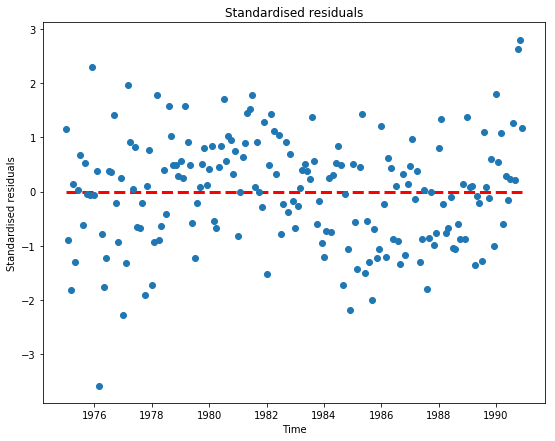

In [29]:
#Plotting the standardised residuals
fig,ax=plt.subplots(figsize=(9,7))
ax.plot(beersales_df.time_stamp, standardised_residuals_2,'o')
ax.set(xlabel="Time",ylabel="Standardised residuals",title="Standardised residuals")

#To get the horizontal zero line
xmin=min(beersales_df.time_stamp)
xmax=max(beersales_df.time_stamp)
ax.hlines(y=0,xmin=xmin,xmax=xmax,color='red',linestyle='--',lw=3)

#There is no easy way to plot monthly symbols in python

In [30]:
#Fitting a quadratic trend model to the data

#Creating the components of the model manually
x=beersales_df.time_stamp
y=beersales_df.beersales
x2=x*x

df = pd.DataFrame(columns=['y','x','x2'])
df['x'] = x
df['y'] = y
df['x2'] = x2

#Fitting the quadratic trend model to the data
model_quad2 = smf.ols(formula='y ~ x + x2', data=df).fit()

#Displaying the summary of the model
model_quad2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     23.03
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           1.12e-09
Time:                        00:10:11   Log-Likelihood:                -374.65
No. Observations:                 192   AIC:                             755.3
Df Residuals:                     189   BIC:                             765.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.267e+04   2.55e+04     -2.847      0.005   -1.23e+05   -2.23e+04
x             73.1465     25.747      2.841      0.005      22.357     123.936
x2            -0.0184      0.006     -2.835      0.005      -0.031      -0.006
==============================================================================
Omnibus:                      133.432   Durbin-Watson:                   0.548
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.058
Skew:                          -0.067   Prob(JB):                      0.00146
Kurtosis:                       1.729   Cond. No.                     8.10e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.1e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#Getting the standardised residuals of the quadratic trend model

#Create instance of influence
influence = model_quad2.get_influence()
#Standardised residuals
standardised_residuals_3 = influence.resid_studentized_internal

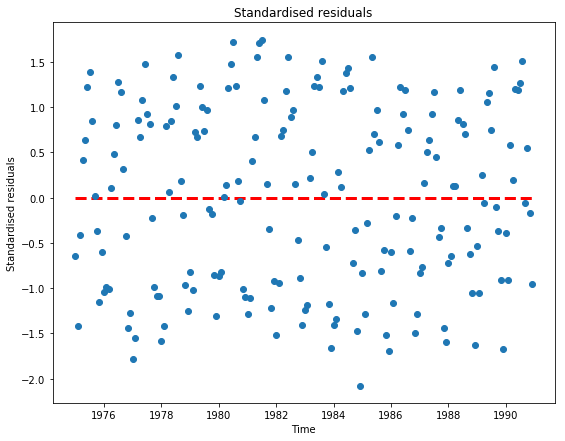

In [32]:
#Plotting the standardised residuals
fig,ax=plt.subplots(figsize=(9,7))
ax.plot(beersales_df.time_stamp, standardised_residuals_3,'o')
ax.set(xlabel="Time",ylabel="Standardised residuals",title="Standardised residuals")

#To get the horizontal zero line
xmin=min(beersales_df.time_stamp)
xmax=max(beersales_df.time_stamp)
ax.hlines(y=0,xmin=xmin,xmax=xmax,color='red',linestyle='--',lw=3)

#There is no easy way to plot monthly symbols in python

In [33]:
##Task 3

#Reading in the necessary data

NMFS_Landings = pd.read_csv("NMFS_Landings.csv")

NMFS_Landings.head()

,Year,Month,Metric_Tons,Pounds,USD
0,1991,Jan,351326.5,774534405,191604004
1,1992,Jan,262536.1,578787115,218621496
2,1993,Jan,232721.6,513058114,192808664
3,1994,Jan,275698.6,607805045,190230003
4,1995,Jan,255170.8,562549624,267496882


In [34]:
NMFS_Landings.dtypes

Year             int64
Month           object
Metric_Tons    float64
Pounds           int64
USD              int64
dtype: object

In [35]:
#Selecting only required columns
NMFS_Landings = NMFS_Landings[['Year','Month','Metric_Tons']]

#Creating a time column by concatenating the month and year details
NMFS_Landings["Time"] =  NMFS_Landings["Month"].map(str)+"-"+ NMFS_Landings["Year"].map(str)

#Converting the Time column to datetime format
NMFS_Landings['Time'] = pd.to_datetime(NMFS_Landings['Time'])

NMFS_Landings.head()

,Year,Month,Metric_Tons,Time
0,1991,Jan,351326.5,1991-01-01
1,1992,Jan,262536.1,1992-01-01
2,1993,Jan,232721.6,1993-01-01
3,1994,Jan,275698.6,1994-01-01
4,1995,Jan,255170.8,1995-01-01


In [36]:
#Selecting only required columns
NMFS_Landings = NMFS_Landings[['Time','Metric_Tons']]

NMFS_Landings.head()

,Time,Metric_Tons
0,1991-01-01,351326.5
1,1992-01-01,262536.1
2,1993-01-01,232721.6
3,1994-01-01,275698.6
4,1995-01-01,255170.8


In [37]:
#Creating the date column based on datetime64 format
NMFS_Landings['CorrectDate'] = pd.to_datetime(NMFS_Landings['Time'])

#Setting the index of the dataframe to the CorrectDate column
NMFS_Landings.set_index('CorrectDate', inplace=True)
#There is no need to convert the column to ts object as in R - setting to index would suffice
#No need to transpose the data as it is already in the right format

#Sorting the data by date for plotting
NMFS_Landings= NMFS_Landings.sort_values(by="CorrectDate")

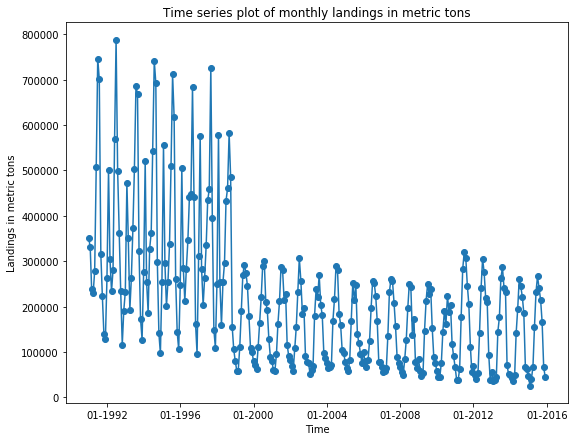

In [38]:
#Plotting the time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(NMFS_Landings.index.values, NMFS_Landings['Metric_Tons'],'-o')
ax.set(xlabel="Time",ylabel="Landings in metric tons",title="Time series plot of monthly landings in metric tons")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%m-%Y"))

#There is no easy way to plot month symbols in python

In [39]:
#Getting lag of the time series

NMFS_Landings_lag= NMFS_Landings.shift(+1)

[Text(0, 0.5, 'Landings in metric tons'),
 Text(0.5, 0, 'Previous year landings in metric tons'),
 Text(0.5, 1.0, 'Scatter plot of neighboring landings in metric tons')]

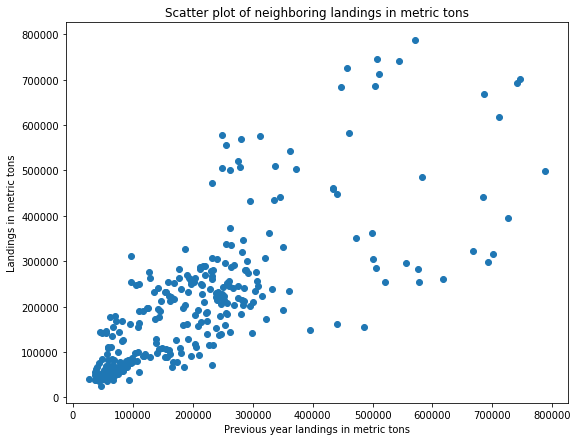

In [40]:
#Plotting the lagged vs original time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(NMFS_Landings_lag['Metric_Tons'], NMFS_Landings['Metric_Tons'],'o')
ax.set(xlabel="Previous year landings in metric tons",ylabel="Landings in metric tons",title="Scatter plot of neighboring landings in metric tons")


In [41]:
#Checking shape of the lagged time series
NMFS_Landings_lag.shape

(300, 2)

In [42]:
#Removing the first NA value from the lagged variable
NMFS_Landings_lag = NMFS_Landings_lag.iloc[1:,]

NMFS_Landings_lag.shape

(299, 2)

In [43]:
#Setting the original series to the same index as the lagged one
NMFS_Landings_indexed = NMFS_Landings.iloc[1:300,]

NMFS_Landings_indexed.shape

(299, 2)

In [44]:
#Calculating correlation of the landings and lagged landings data
from scipy.stats.stats import pearsonr   

pearsonr(NMFS_Landings_indexed.Metric_Tons, NMFS_Landings_lag.Metric_Tons)

(0.7534892861627775, 4.945944713997294e-56)

In [45]:
#In the absence of the time function in Python, the time variable is manually created for the linear regression

NMFS_Landings['year'] =NMFS_Landings['Time'].dt.year
NMFS_Landings['month'] =NMFS_Landings['Time'].dt.month
NMFS_Landings['time_stamp'] = NMFS_Landings.year+((NMFS_Landings.month-1)/12)

In [46]:
#Fitting a linear time trend to the series
x=NMFS_Landings.time_stamp
y=NMFS_Landings.Metric_Tons

#Adding the intercept term
x = sm.add_constant(x)

#Fitting the linear regression model
model = sm.OLS(y,x)
model_linear2 = model.fit()

#Displaying the summary of the model
model_linear2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Metric_Tons   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     116.6
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           3.66e-23
Time:                        00:10:12   Log-Likelihood:                -3965.0
No. Observations:                 300   AIC:                             7934.
Df Residuals:                     298   BIC:                             7941.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.33e+07   2.14e+06     10.898      0.000    1.91e+07    2.75e+07
time_stamp -1.153e+04   1067.296    -10.799      0.000   -1.36e+04   -9425.794
==============================================================================
Omnibus:                       48.295   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.376
Skew:                           1.037   Prob(JB):                     1.42e-15
Kurtosis:                       4.080   Cond. No.                     5.56e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

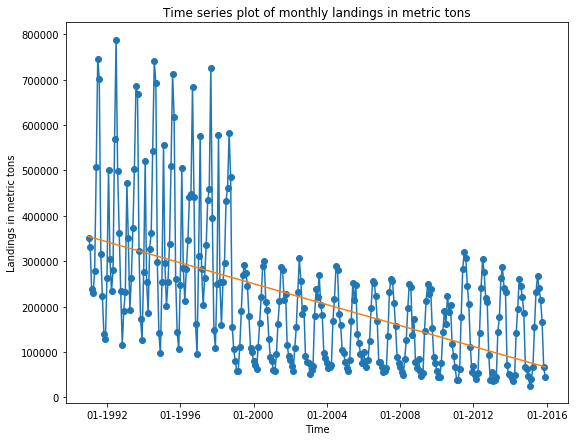

In [47]:
#Plotting the time series data with the linear trend line

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(NMFS_Landings.index.values, NMFS_Landings['Metric_Tons'],'-o')
ax.set(xlabel="Time",ylabel="Landings in metric tons",title="Time series plot of monthly landings in metric tons")

#To plot the linear regression line of best fit 
ax.plot(model_linear2.fittedvalues)

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%m-%Y"))

#There is no easy way to plot month symbols in python

In [48]:
#Fitting a quadratic trend model

#Creating the components of the model manually
x=NMFS_Landings.time_stamp
y=NMFS_Landings.Metric_Tons
x2=x*x

df = pd.DataFrame(columns=['y','x','x2'])
df['x'] = x
df['y'] = y
df['x2'] = x2

#Fitting the quadratic trend model to the data
model_quad3 = smf.ols(formula='y ~ x + x2', data=df).fit()

#Displaying the summary of the model
model_quad3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.336
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     75.07
Date:                Thu, 09 Jan 2020   Prob (F-statistic):           4.11e-27
Time:                        00:10:12   Log-Likelihood:                -3953.2
No. Observations:                 300   AIC:                             7912.
Df Residuals:                     297   BIC:                             7924.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.178e+09   6.39e+08      4.972      0.000    1.92e+09    4.44e+09
x          -3.161e+06   6.38e+05     -4.954      0.000   -4.42e+06   -1.91e+06
x2           785.9259    159.224      4.936      0.000     472.575    1099.277
==============================================================================
Omnibus:                       41.507   Durbin-Watson:                   0.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.075
Skew:                           0.914   Prob(JB):                     4.04e-13
Kurtosis:                       4.106   Cond. No.                     3.46e+11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.46e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

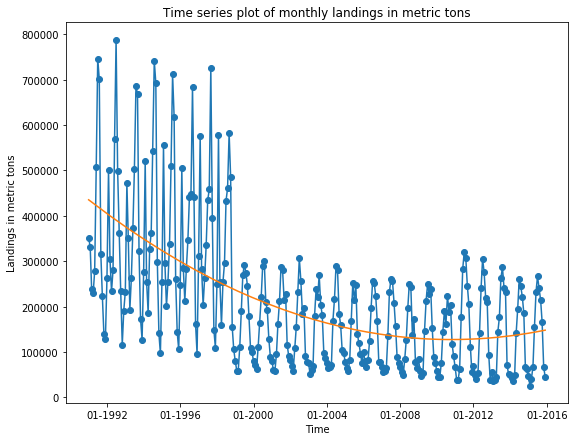

In [49]:
#Plotting the time series data with quadratic trend line

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(NMFS_Landings.index.values, NMFS_Landings['Metric_Tons'],'-o')
ax.set(xlabel="Time",ylabel="Landings in metric tons",title="Time series plot of monthly landings in metric tons")

#To plot the quadratic regression line of best fit 
ax.plot(model_quad3.fittedvalues)

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%m-%Y"))

#There is no easy way to plot month symbols in python

In [50]:
#Fitting a harmonic trend model (no clear way yet in python - to be updated if a way is found)


In [51]:
#Residual checks of linear trend model

#Getting the standardised residuals of the linear trend model

#Create instance of influence
influence = model_linear2.get_influence()
#Standardised residuals
standardised_residuals_4 = influence.resid_studentized_internal

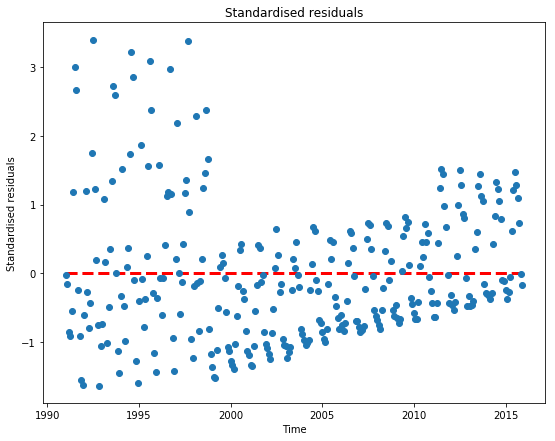

In [52]:
#Plotting the standardised residuals

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(NMFS_Landings.time_stamp, standardised_residuals_4,'o')
ax.set(xlabel="Time",ylabel="Standardised residuals",title="Standardised residuals")

#To get the horizontal zero line
xmin=min(NMFS_Landings.time_stamp)
xmax=max(NMFS_Landings.time_stamp)
ax.hlines(y=0,xmin=xmin,xmax=xmax,color='red',linestyle='--',lw=3)

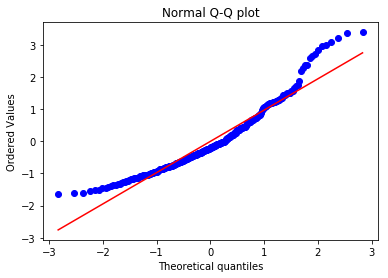

In [53]:
#Checking normality of residuals using QQ plot
z = (standardised_residuals_4-np.mean(standardised_residuals_4))/np.std(standardised_residuals_4)

scp.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [54]:
#Shapiro-Wilk's test for normality

scp.shapiro(standardised_residuals_4)

(0.932181715965271, 1.8191689821200896e-10)

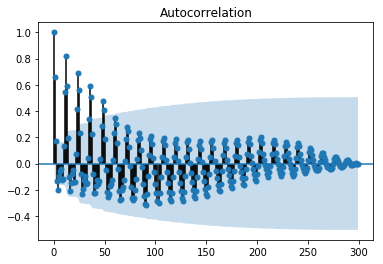

In [55]:
#Creating the ACF plot

sm.graphics.tsa.plot_acf(standardised_residuals_4);

In [56]:
#Residual checks of quadratic trend model

#Getting the standardised residuals of the quadratic trend model

#Create instance of influence
influence = model_quad3.get_influence()
#Standardised residuals
standardised_residuals_5 = influence.resid_studentized_internal

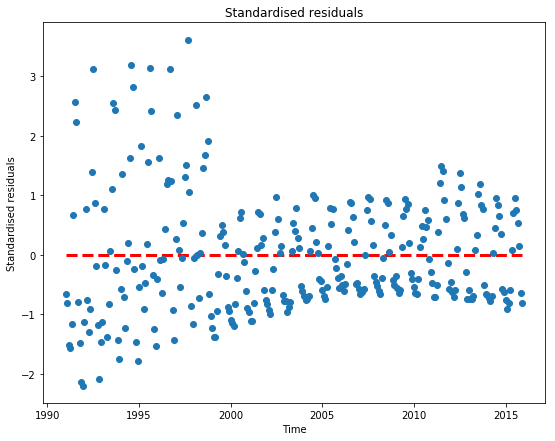

In [57]:
#Plotting the standardised residuals

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(NMFS_Landings.time_stamp, standardised_residuals_5,'o')
ax.set(xlabel="Time",ylabel="Standardised residuals",title="Standardised residuals")

#To get the horizontal zero line
xmin=min(NMFS_Landings.time_stamp)
xmax=max(NMFS_Landings.time_stamp)
ax.hlines(y=0,xmin=xmin,xmax=xmax,color='red',linestyle='--',lw=3)

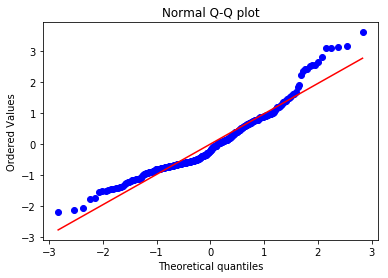

In [58]:
#Checking normality of residuals using QQ plot
z = (standardised_residuals_5-np.mean(standardised_residuals_5))/np.std(standardised_residuals_5)

scp.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [59]:
#Shapiro-Wilk's test for normality

scp.shapiro(standardised_residuals_5)

(0.9459764957427979, 4.875970294193621e-09)

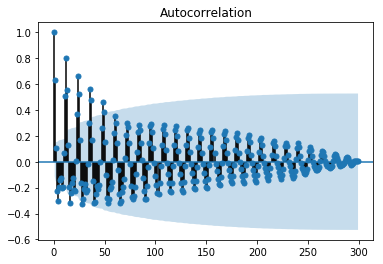

In [60]:
#Creating the ACF plot

sm.graphics.tsa.plot_acf(standardised_residuals_5);